# Problem 1- Salary Data set(One way ANOVA)

### importing libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Loading the data set

In [51]:
df=pd.read_csv('SalaryData.csv')

## Viewing the top 10 records

In [53]:
df.head(10)

Education       Occupation  Salary
0   Doctorate     Adm-clerical  153197
1   Doctorate     Adm-clerical  115945
2   Doctorate     Adm-clerical  175935
3   Doctorate     Adm-clerical  220754
4   Doctorate            Sales  170769
5   Doctorate            Sales  219420
6   Doctorate            Sales  237920
7   Doctorate            Sales  160540
8   Doctorate            Sales  180934
9   Doctorate   Prof-specialty  248156

## Checking the shape and information of the dataframe

In [4]:
df.shape

(40, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Checking the summary of the dataframe

In [54]:
df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

## checking for missing values

In [7]:
df.isnull().sum() # There are no missing values in the data

Education     0
Occupation    0
Salary        0
dtype: int64

## Checking total no of records of education & occupation

In [8]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## Formulate the Null and Alternate Hypothesis(For Education)

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Null Hypothesis 𝐻0 : The mean salary is the same with respect to all the 3 categories of education.(Doctorate, Bachelors, HS-Grad)

Alternate Hypothesis 𝐻1 : The mean salary is different in at least one category of education

## One way ANOVA(Education)

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
print(anova_lm(ols('Salary ~ C(Education)', df).fit()))

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


## Conclusion: Since the p value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean salaries for at-least one category of education.

## Formulate the Null and Alternate Hypothesis(For Occupation)

Null Hypothesis 𝐻0 : The mean salary is the same with respect to all the 4 categories of occupation.

Alternate Hypothesis 𝐻1 : The mean salary is different in at least one category of occupation

## One way ANOVA(Occupation)

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
print(anova_lm(ols('Salary ~ C(Occupation)', df).fit()))

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


## Conclusion: Since the p value is greater than the significance level (0.05), we fail to reject the null hypothesis( we accept H0) and conclude that there is no difference in the mean salaries across the 4 categories of occupation.

## To check which mean salary is different across education category

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [13]:
compare = MultiComparison(df['Salary'], df['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


## To check which mean salary is different across occupation category

In [14]:
compare = MultiComparison(df['Salary'], df['Occupation'])
result = compare.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


## Interaction plot between the 2 categorical variables

## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

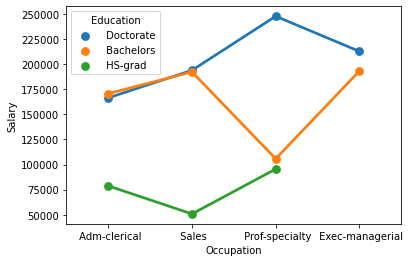

In [15]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education', ci=None)

## Formulate the hypothesis of ANOVA with both 'Education' and 'Occupation' variables with respect to the variable 'Salary'.

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0 : The mean salary variable with respect to each education category and occupation is equal.

𝐻1 : At least one of the means of 'salary' variable with respect to each education category and occupation is unequal.

## Two way Anova

In [16]:
formula = 'Salary ~ C(Education) + C(Occupation)+ C(Education): C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


## As p value = 2.232500e-05 is lesser than 0.05, we reject the null hypothesis and this implies that there is significant amount of interaction between the variables, Education and Occupation and hence, at least one of the means of the salary variable with respect to each education category and occupation is unequal.

# Problem 2- EducationPost12std dataset

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

## Import data set

In [57]:
df1= pd.read_csv('Education+-+Post+12th+Standard.csv')

In [58]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [59]:
df1.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

## Description of the data

In [56]:
df1.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal    SF_Ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.624196   79.702703   14.089704    22.743887   
std     677.071454   16.291967   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  100.000000  100.000000   39.800000    64.000000   

             Expend   Grad_Rate  
count    777.000000  777.000000  
mean    9660.171171   65.395109  
std     5221.768440   17.073737  
min     3186.000000   10.000000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    56233.000000  100.000000

## View the shape of the data

In [24]:
df1.shape

(777, 18)

## View information

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Check for missing values

In [26]:
df1.isnull().sum() 

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Check for duplicate records

In [27]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## Check for outliers


In [28]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

<AxesSubplot:>

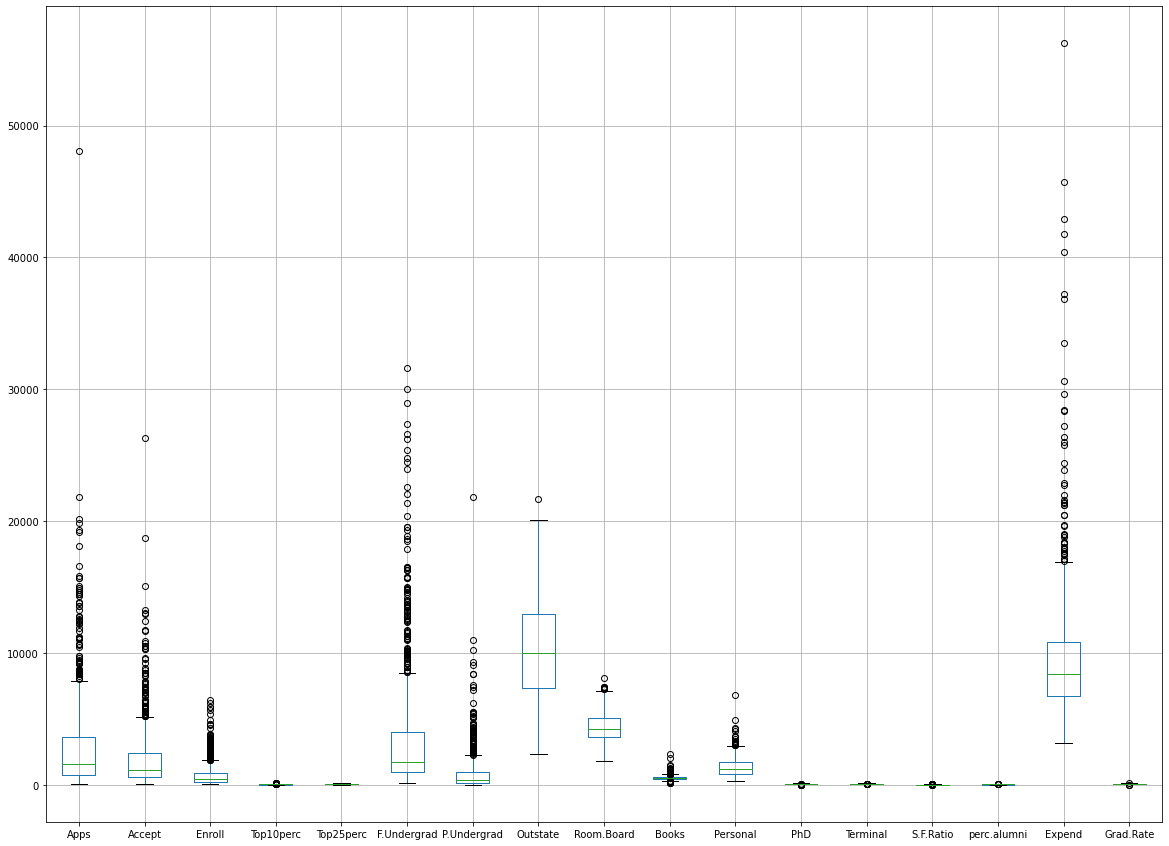

In [29]:
df1.boxplot(figsize=(20,15))

## Renaming few column names

In [60]:
df1.rename(columns = {'F.Undergrad':'F_Undergrad', 'P.Undergrad':'P_Undergrad','Room.Board':'Room_Board', 'S.F.Ratio':'SF_Ratio','perc.alumni':'perc_alumni'
                     , 'Grad.Rate' : 'Grad_Rate'},inplace=True)

## Treating anomalies

In [40]:
df1.Grad_Rate.unique()

array([ 60,  56,  54,  59,  15,  55,  63,  73,  80,  52,  76,  74,  68,
        69, 100,  46,  34,  48,  70,  65,  88,  58,  71,  85,  79,  91,
        72,  84,  49,  82,  35,  51,  75,  53,  96,  67,  18,  33,  97,
        89,  93,  78,  83,  61,  81,  64,  62, 118,  24,  66,  47,  50,
        21,  87,  77,  43,  95,  37,  99,  45,  42,  98,  94,  38,  86,
        44,  22,  57,  29,  36,  39,  40,  26,  90,  92,  32,  27,  41,
        31,  10,  30], dtype=int64)

In [41]:
df1.PhD.unique()

array([ 70,  29,  53,  92,  76,  67,  90,  89,  79,  40,  82,  73,  60,
        36,  78,  93,  48,  62,  69,  83,  55,  88,  57,  85,  65,  66,
        81,  59,  58,  68,  98,  71,  74,  61,  87,  64,  35,  80,  63,
        75,  39,  99, 100,  95,  77,  72,  10,  86,  22,  50,  41,   8,
        94,  56,  46,  54,  84,  97,  51,  42,  49,  52,  43,  37,  45,
        47,  91,  25,  31,  96,  34,  33,  44,  32,  14, 103,  26,  16],
      dtype=int64)

In [61]:
df1['Grad_Rate'] = df1['Grad_Rate'].replace(118, df1['Grad_Rate'].median())
df1.Grad_Rate.describe()

count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64

In [62]:
df1['PhD'] = df1['PhD'].replace(103, df1['PhD'].median())
df1.PhD.describe()

count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64

## Data Visualization

## Univariate Analysis

In [44]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'SF_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

In [63]:
listcolumns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books','Personal', 'PhD', 'Terminal'
               , 'SF_Ratio','perc_alumni','Expend','Grad_Rate']
            

In [46]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    print('')
    print('')
    
    print("University wise listing   " + column)
    print("----------------------------------------------------------------------------")
    print(df1.groupby('Names')[column].max().sort_values(ascending=False),end=' ')
    print('')
    print('')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df1[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 

University wise listing   Apps
----------------------------------------------------------------------------
Names
Rutgers at New Brunswick                48094
Purdue University at West Lafayette     21804
Boston University                       20192
University of California at Berkeley    19873
Pennsylvania State Univ. Main Campus    19315
                                        ...  
Wisconsin Lutheran College                152
Saint Mary-of-the-Woods College           150
College of St. Joseph                     141
Capitol College                           100
Christendom College                        81
Name: Apps, Length: 777, dtype: int64 

Distribution of Apps
-----------------

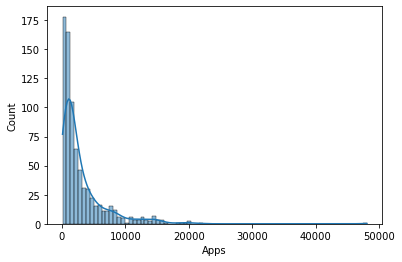

BoxPlot of Apps
----------------------------------------------------------------------------


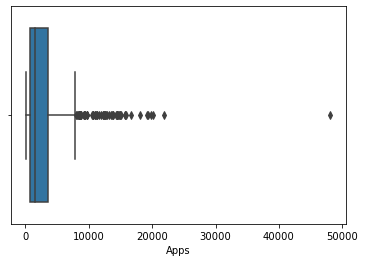

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 

University wise listing   Accept
----------------------------------------------------------------------------
Names
Rutgers at New Brunswick               26330
Purdue University at West Lafayette    18744
Michigan State University              15096
Indiana University at Bloomington      13243
Boston University                      13007
                                       ...  
Saint Mary-of-the-Woods College          130
Wisconsin Lutheran College               128
College of St. Joseph                    118
Capitol College                           90
Christendom College                       72
Name: Accept, Length: 777, dtype: int64 

Distribution of Accept
------------------

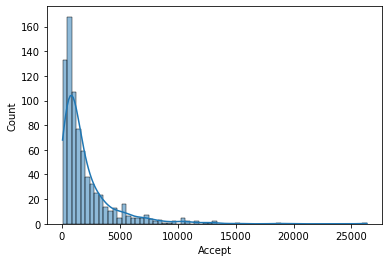

BoxPlot of Accept
----------------------------------------------------------------------------


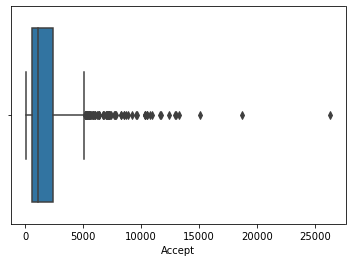

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 

University wise listing   Enroll
----------------------------------------------------------------------------
Names
Texas A&M Univ. at College Station     6392
Michigan State University              6180
Purdue University at West Lafayette    5874
Indiana University at Bloomington      5873
University of Illinois - Urbana        5705
                                       ... 
College of St. Joseph                    55
Alaska Pacific University                55
Christendom College                      51
Wilson College                           46
Capitol College                          35
Name: Enroll, Length: 777, dtype: int64 

Distribution of Enroll
-------------------------------------

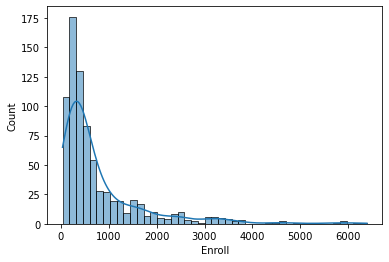

BoxPlot of Enroll
----------------------------------------------------------------------------


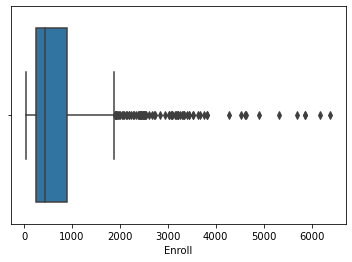

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 

University wise listing   Top10perc
----------------------------------------------------------------------------
Names
Massachusetts Institute of Technology    96
University of California at Berkeley     95
Harvey Mudd College                      95
Yale University                          95
Duke University                          90
                                         ..
Morris College                            2
Virginia State University                 2
North Adams State College                 1
Fayetteville State University             1
Center for Creative Studies               1
Name: Top10perc, Length: 777, dtype: int64 

Distribution of Top10perc
------------------------------

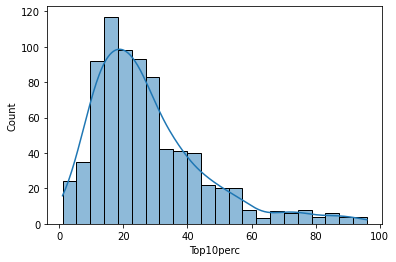

BoxPlot of Top10perc
----------------------------------------------------------------------------


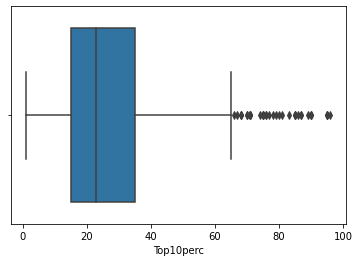

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 

University wise listing   Top25perc
----------------------------------------------------------------------------
Names
Harvey Mudd College           100
Harvard University            100
Bowdoin College               100
SUNY at Buffalo               100
University of Pennsylvania    100
                             ... 
Franklin Pierce College        14
Johnson State College          13
Morris College                 13
Mayville State University      12
Huron University                9
Name: Top25perc, Length: 777, dtype: int64 

Distribution of Top25perc
----------------------------------------------------------------------------


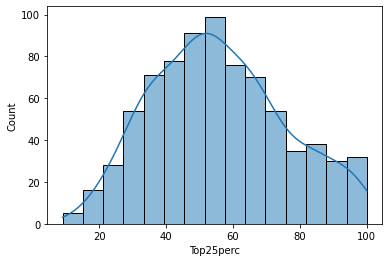

BoxPlot of Top25perc
----------------------------------------------------------------------------


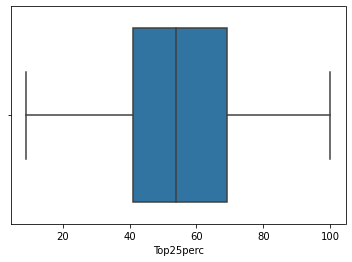

Description of F_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F_Undergrad, dtype: float64 

University wise listing   F_Undergrad
----------------------------------------------------------------------------
Names
Texas A&M Univ. at College Station      31643
University of Texas at Austin           30017
Pennsylvania State Univ. Main Campus    28938
Brigham Young University at Provo       27378
Michigan State University               26640
                                        ...  
Wisconsin Lutheran College                282
Alaska Pacific University                 249
College of St. Joseph                     201
Wilson College                            199
Christendom College                       139
Name: F_Undergrad, Length: 777, dtype: int64 

Distributi

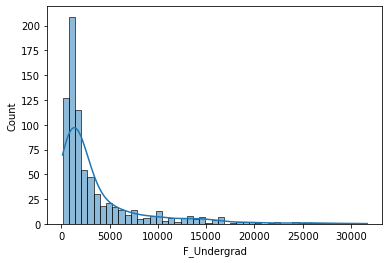

BoxPlot of F_Undergrad
----------------------------------------------------------------------------


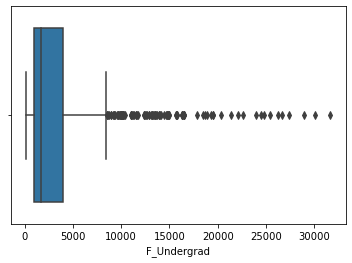

Description of P_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P_Undergrad, dtype: float64 

University wise listing   P_Undergrad
----------------------------------------------------------------------------
Names
University of Minnesota Twin Cities    21836
University of South Florida            10962
Northeastern University                10221
Florida International University        9310
Georgia State University                9054
                                       ...  
Bennington College                         2
College of Wooster                         1
Kenyon College                             1
Hampden - Sydney College                   1
Claremont McKenna College                  1
Name: P_Undergrad, Length: 777, dtype: int64 

Distribution of P_Und

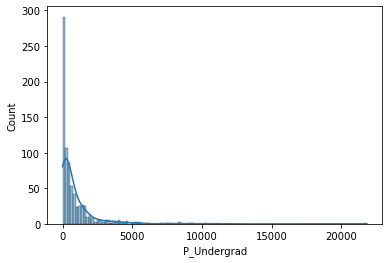

BoxPlot of P_Undergrad
----------------------------------------------------------------------------


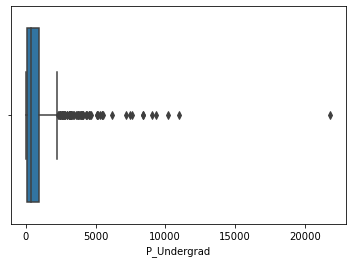

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 

University wise listing   Outstate
----------------------------------------------------------------------------
Names
Bennington College                       21700
Massachusetts Institute of Technology    20100
Gettysburg College                       19964
Reed College                             19960
Princeton University                     19900
                                         ...  
Arkansas Tech University                  3460
Stockton College of New Jersey            3040
Wayne State College                       2700
Peru State College                        2580
Brigham Young University at Provo         2340
Name: Outstate, Length: 777, dtype: int64 

Distributio

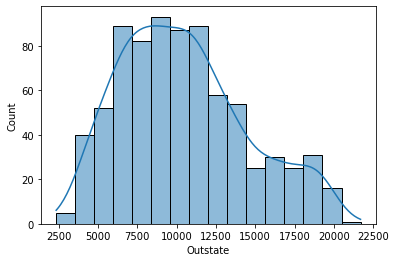

BoxPlot of Outstate
----------------------------------------------------------------------------


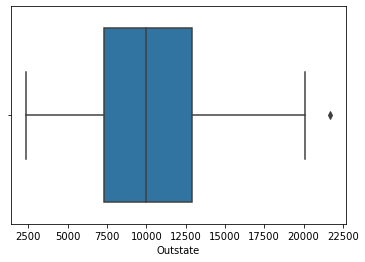

Description of Room_Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room_Board, dtype: float64 

University wise listing   Room_Board
----------------------------------------------------------------------------
Names
Barnard College                            8124
Northeastern University                    7425
Mary Baldwin College                       7400
North Central College                      7398
Scripps College                            7350
                                           ... 
South Dakota State University              2190
Dickinson State University                 2146
University of Sci. and Arts of Oklahoma    1920
Delta State University                     1880
North Carolina A. & T. State University    1780
Name: Room_Board, Length: 777, dtype: int64 



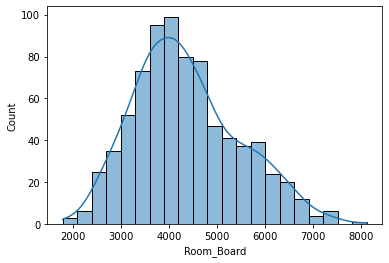

BoxPlot of Room_Board
----------------------------------------------------------------------------


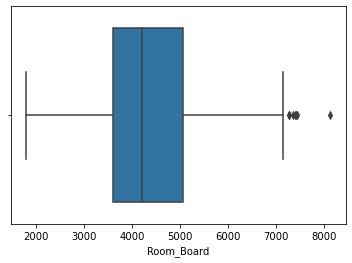

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 

University wise listing   Books
----------------------------------------------------------------------------
Names
Center for Creative Studies            2340
Bradley University                     2000
Bowdoin College                        1495
Wesleyan University                    1400
University of the Arts                 1300
                                       ... 
Southeast Missouri State University     200
Missouri Southern State College         200
Eastern Illinois University             120
Western Carolina University             110
Appalachian State University             96
Name: Books, Length: 777, dtype: int64 

Distribution of Books
------------------------------------------

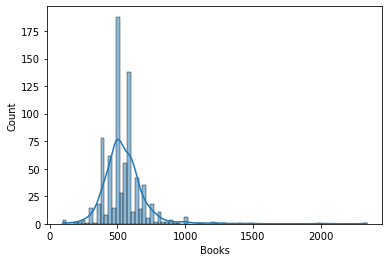

BoxPlot of Books
----------------------------------------------------------------------------


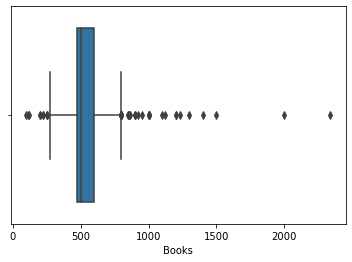

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 

University wise listing   Personal
----------------------------------------------------------------------------
Names
Saint Louis University                   6800
MidAmerica Nazarene College              4913
University of Missouri at Saint Louis    4288
Lindenwood College                       4200
Oglethorpe University                    4110
                                         ... 
Villanova University                      300
Columbia University                       300
Cabrini College                           300
Washington College                        300
Benedictine College                       250
Name: Personal, Length: 777, dtype: int64 

Distribution of Personal
-----

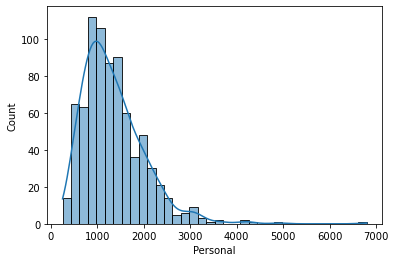

BoxPlot of Personal
----------------------------------------------------------------------------


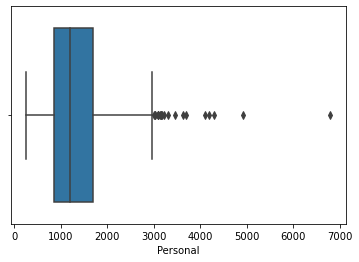

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64 

University wise listing   PhD
----------------------------------------------------------------------------
Names
Bryn Mawr College                           100
Pitzer College                              100
Harvey Mudd College                         100
Brown University                             99
New Mexico Institute of Mining and Tech.     99
                                           ... 
University of the Arts                       16
Savannah Coll. of Art and Design             14
Wentworth Institute of Technology            10
Capitol College                              10
Center for Creative Studies                   8
Name: PhD, Length: 777, dtype: int64 

Distribution of PhD
----------------

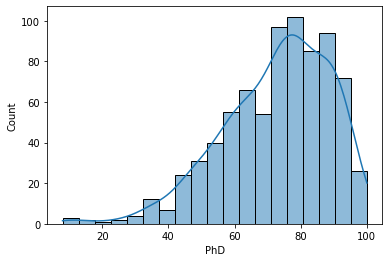

BoxPlot of PhD
----------------------------------------------------------------------------


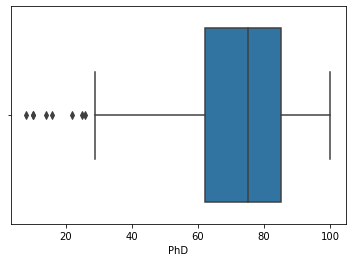

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 

University wise listing   Terminal
----------------------------------------------------------------------------
Names
Harvey Mudd College                         100
Bryn Mawr College                           100
New Mexico Institute of Mining and Tech.    100
University of Texas at San Antonio          100
Scripps College                             100
                                           ... 
MidAmerica Nazarene College                  33
West Liberty State College                   33
Adelphi University                           30
Goldey Beacom College                        25
Salem-Teikyo University                      24
Name: Terminal, Length: 777, dtype: int64 

Distribution of 

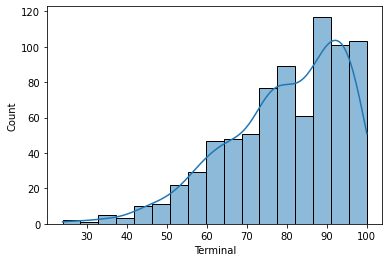

BoxPlot of Terminal
----------------------------------------------------------------------------


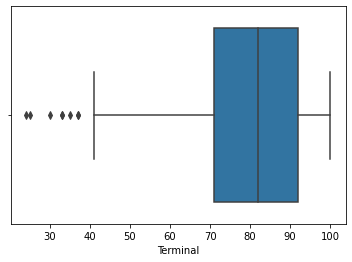

Description of SF_Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: SF_Ratio, dtype: float64 

University wise listing   SF_Ratio
----------------------------------------------------------------------------
Names
Indiana Wesleyan University        39.8
Mesa State College                 28.8
Lesley College                     27.8
Goldey Beacom College              27.6
Saint Joseph's College             27.2
                                   ... 
Wake Forest University              4.3
Washington University               3.9
Johns Hopkins University            3.3
Case Western Reserve University     2.9
University of Charleston            2.5
Name: SF_Ratio, Length: 777, dtype: float64 

Distribution of SF_Ratio
----------------------------------------------------------------------------


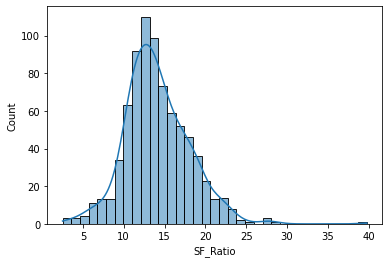

BoxPlot of SF_Ratio
----------------------------------------------------------------------------


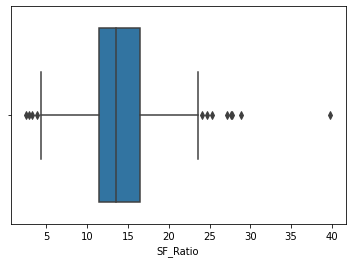

Description of perc_alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc_alumni, dtype: float64 

University wise listing   perc_alumni
----------------------------------------------------------------------------
Names
Williams College                        64
Amherst College                         63
Carleton College                        60
Hamilton College                        60
Centre College                          60
                                        ..
Alaska Pacific University                2
University of Wisconsin at Green Bay     1
Prairie View A. and M. University        1
University of Southern Colorado          0
Central Washington University            0
Name: perc_alumni, Length: 777, dtype: int64 

Distribution of perc_alumni
-------------------------------

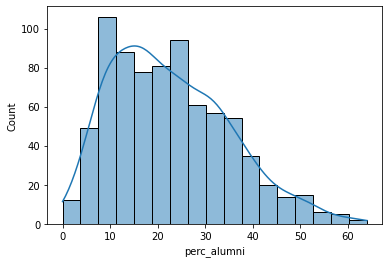

BoxPlot of perc_alumni
----------------------------------------------------------------------------


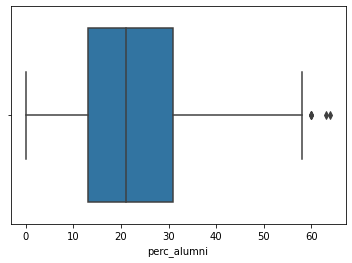

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 

University wise listing   Expend
----------------------------------------------------------------------------
Names
Johns Hopkins University     56233
Washington University        45702
Antioch University           42926
Wake Forest University       41766
Yale University              40386
                             ...  
Upper Iowa University         3733
Texas Southern University     3605
Lindenwood College            3480
Central Wesleyan College      3365
Jamestown College             3186
Name: Expend, Length: 777, dtype: int64 

Distribution of Expend
----------------------------------------------------------------------------


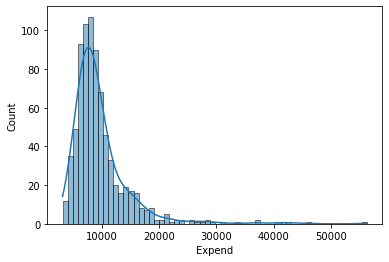

BoxPlot of Expend
----------------------------------------------------------------------------


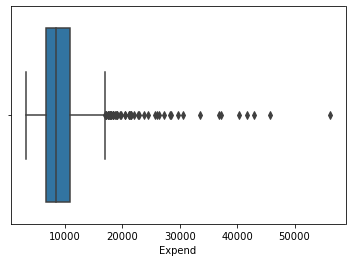

Description of Grad_Rate
----------------------------------------------------------------------------
count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64 

University wise listing   Grad_Rate
----------------------------------------------------------------------------
Names
Santa Clara University         100
Grove City College             100
Harvard University             100
College of Mount St. Joseph    100
Amherst College                100
                              ... 
Huron University                21
Brewton-Parker College          18
Alaska Pacific University       15
Montreat-Anderson College       15
Texas Southern University       10
Name: Grad_Rate, Length: 777, dtype: int64 

Distribution of Grad_Rate
----------------------------------------------------------------------------


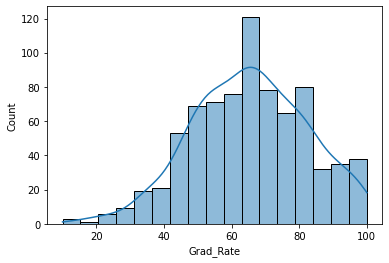

BoxPlot of Grad_Rate
----------------------------------------------------------------------------


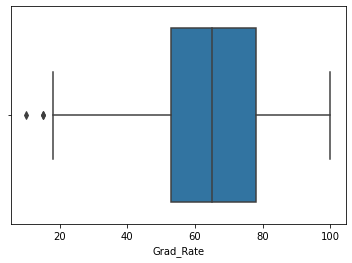

In [47]:
for x in listcolumns:
    univaranalysis(x,20)

## Multi variate Analysis

Bivariate Analysis

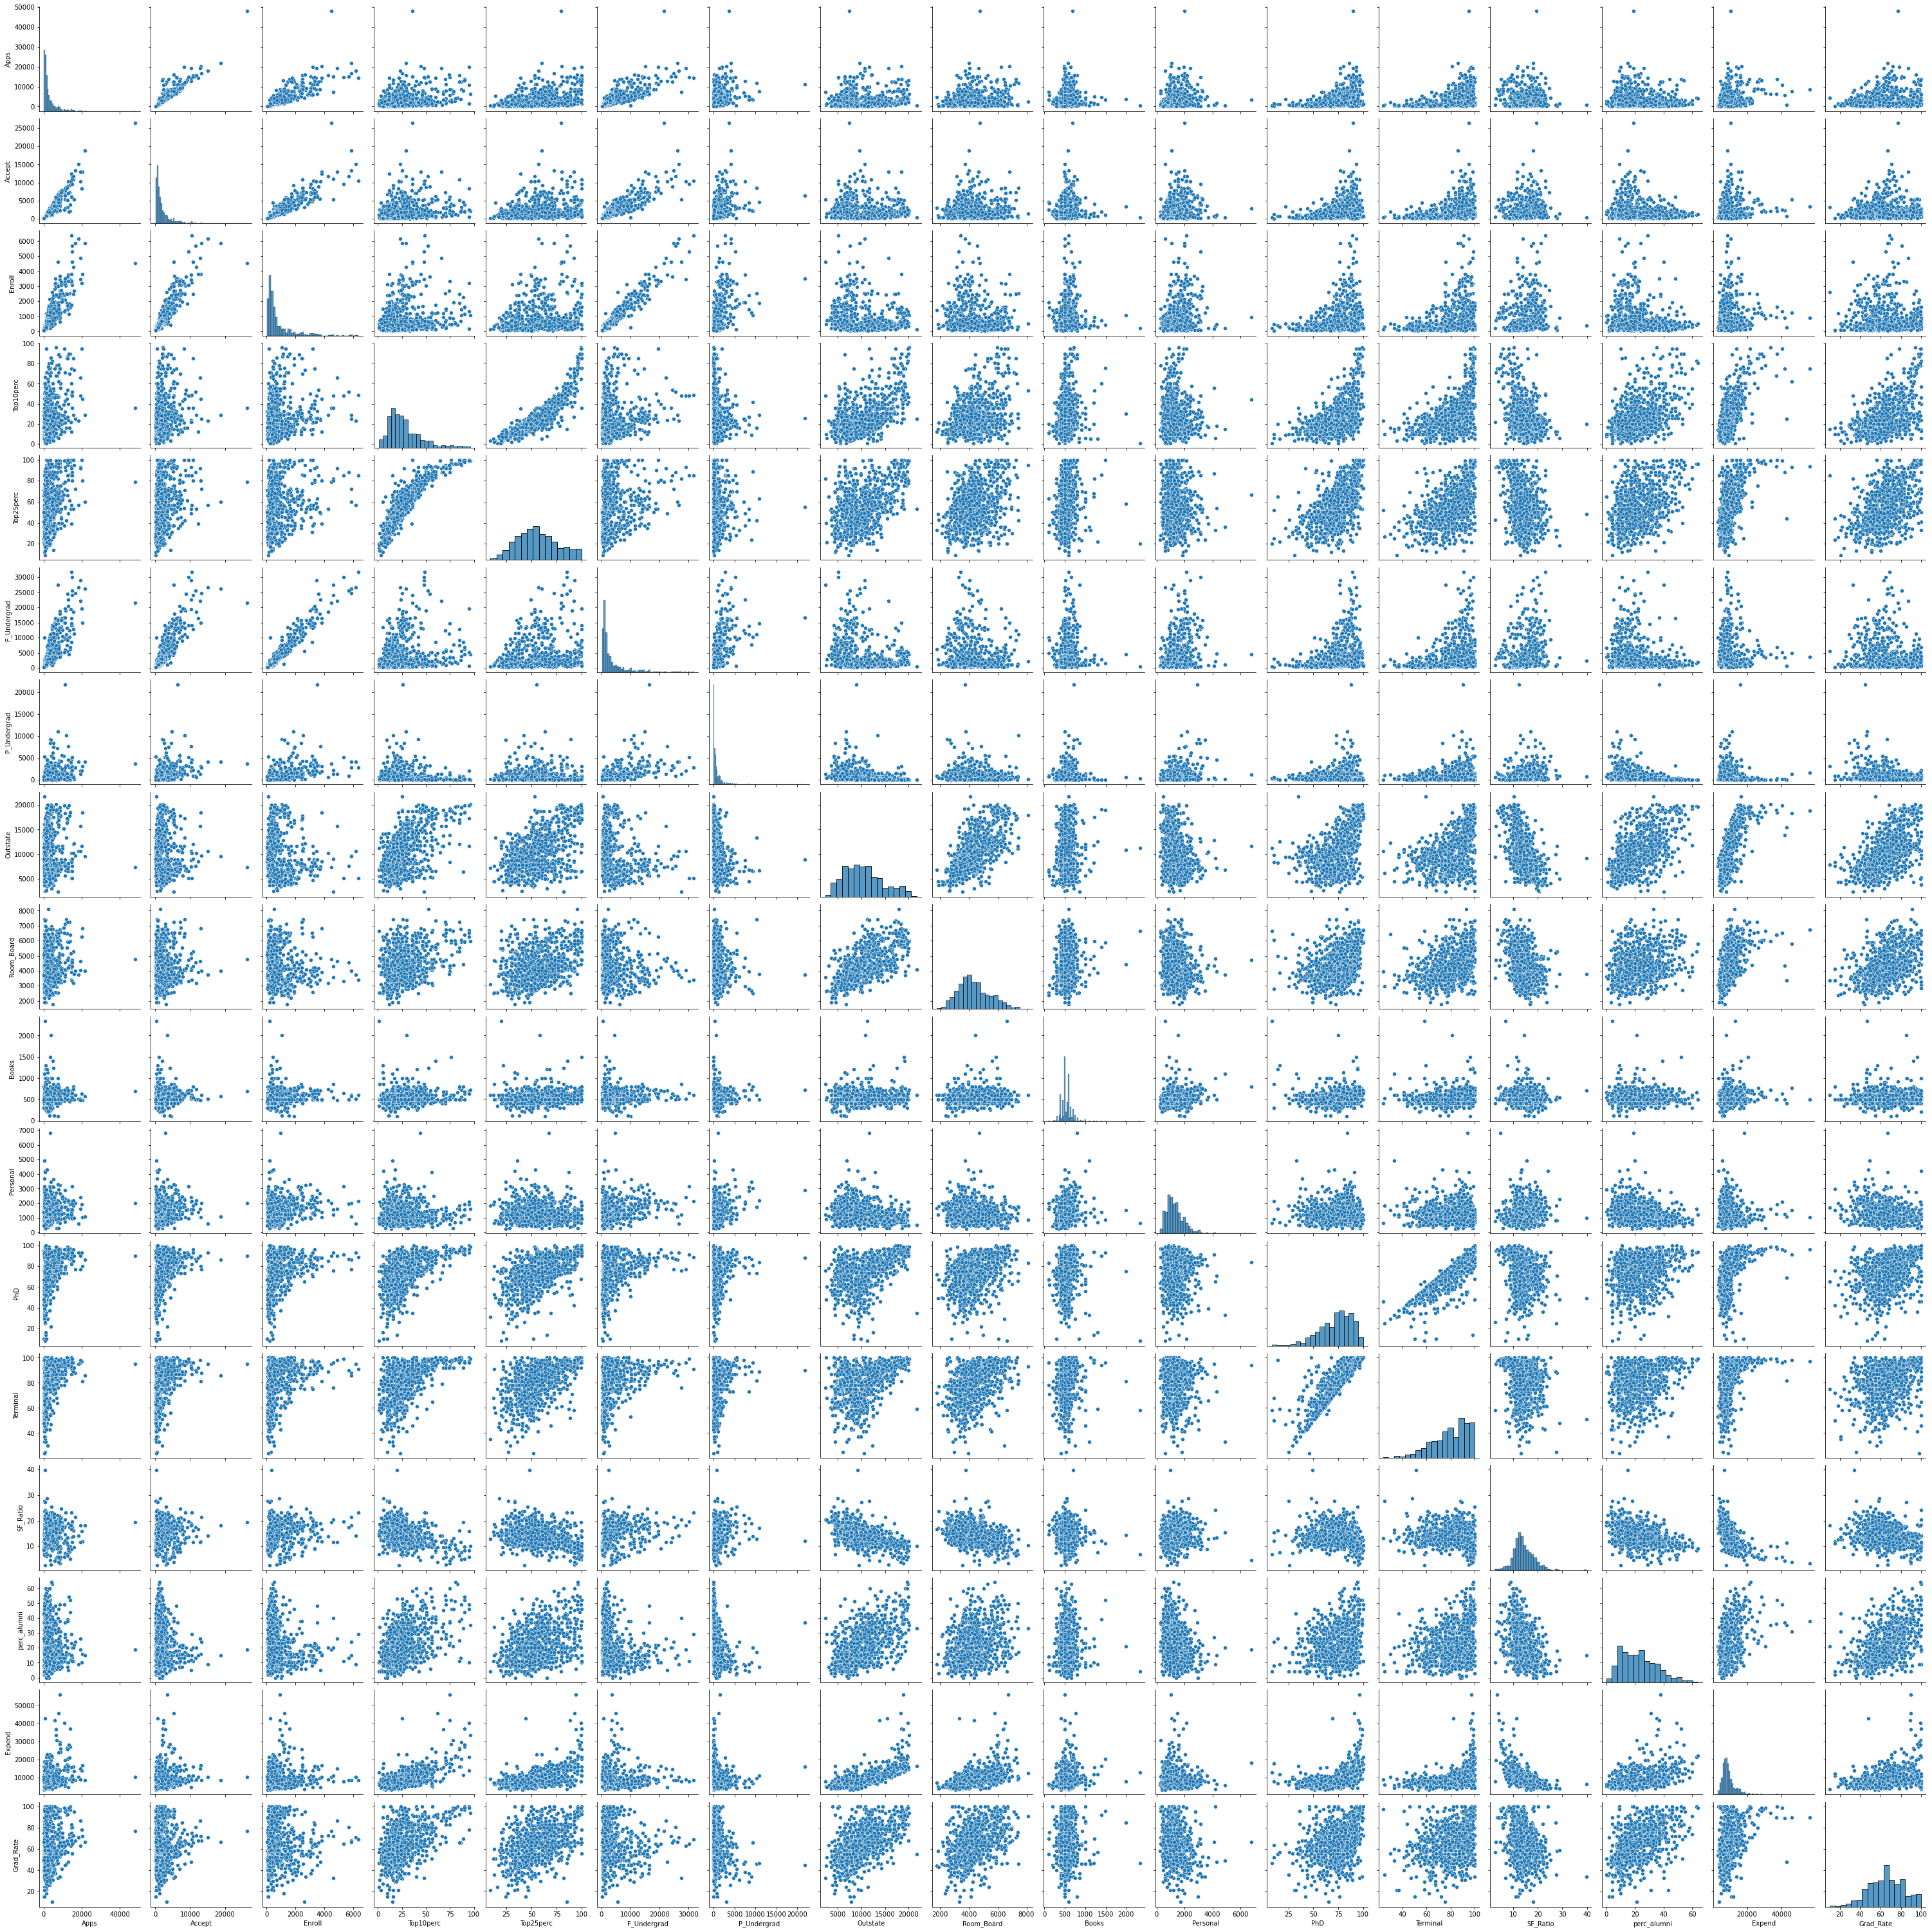

In [64]:
sns.pairplot(df1)

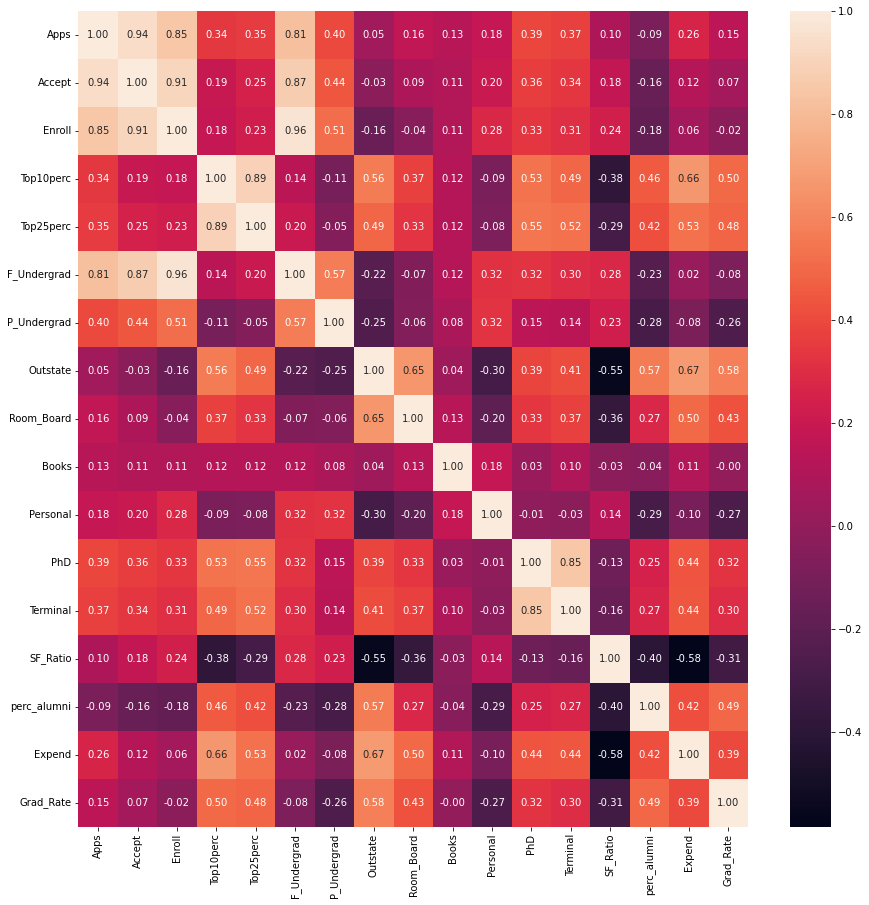

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,fmt=".2f");

<AxesSubplot:xlabel='Apps', ylabel='Accept'>

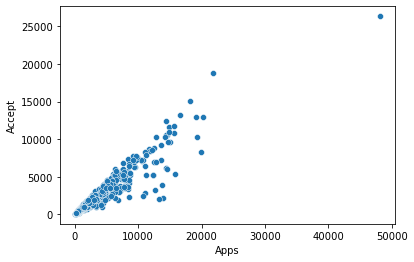

In [66]:
sns.scatterplot(x = 'Apps', y= 'Accept',data=df1)

In [67]:
df1copy = df1.copy()
df1copy['Acceptance Ratio']= round(df1copy['Accept']/df1copy['Apps'] * 100,  2)

In [68]:
df1copy[['Names','Acceptance Ratio']].sort_values(by='Acceptance Ratio', ascending = False).head(10)

Names  Acceptance Ratio
729               Wayne State College            100.00
192          Emporia State University            100.00
355         Mayville State University            100.00
535      Southwest Baptist University            100.00
697  University of Wisconsin-Superior            100.00
368       MidAmerica Nazarene College            100.00
25           Arkansas Tech University             99.71
538    Southwestern Adventist College             99.07
452                 Pikeville College             99.01
391               Mount Marty College             98.92

In [69]:
df1copy[['Names','Acceptance Ratio']].sort_values(by='Acceptance Ratio', ascending = False).tail(10)

Names  Acceptance Ratio
763       Williams College             29.74
144    Columbia University             28.57
174        Duke University             28.23
158      Dartmouth College             26.47
221  Georgetown University             25.92
70        Brown University             25.73
16         Amherst College             23.06
775        Yale University             22.91
250     Harvard University             15.61
459   Princeton University             15.45

In [70]:
df1copy.groupby('Names')['Acceptance Ratio'].max().sort_values(ascending=False)

Names
Wayne State College                 100.00
Mayville State University           100.00
University of Wisconsin-Superior    100.00
Southwest Baptist University        100.00
Emporia State University            100.00
                                     ...  
Brown University                     25.73
Amherst College                      23.06
Yale University                      22.91
Harvard University                   15.61
Princeton University                 15.45
Name: Acceptance Ratio, Length: 777, dtype: float64

<AxesSubplot:xlabel='Apps', ylabel='Enroll'>

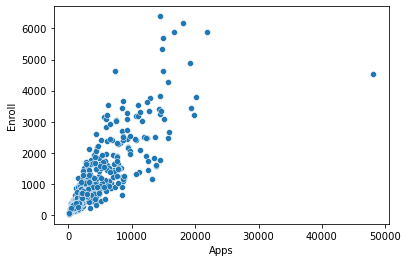

In [71]:
sns.scatterplot(x = 'Apps', y= 'Enroll',data=df1)

<AxesSubplot:xlabel='Accept', ylabel='Enroll'>

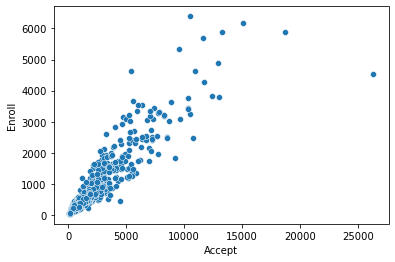

In [72]:
sns.scatterplot(x = 'Accept', y= 'Enroll',data=df1)

<AxesSubplot:xlabel='F_Undergrad', ylabel='Apps'>

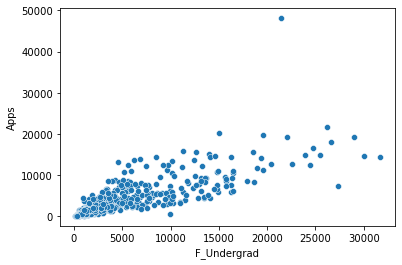

In [73]:
sns.scatterplot(x = 'F_Undergrad', y= 'Apps',data=df1)

<AxesSubplot:xlabel='F_Undergrad', ylabel='Accept'>

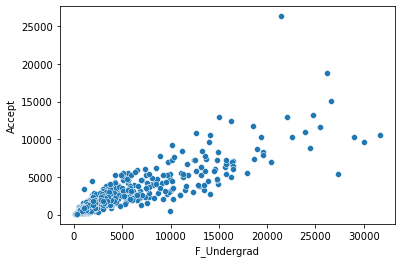

In [74]:
sns.scatterplot(x = 'F_Undergrad', y= 'Accept',data=df1)

<AxesSubplot:xlabel='F_Undergrad', ylabel='Enroll'>

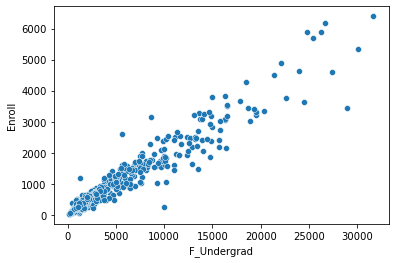

In [75]:
sns.scatterplot(x = 'F_Undergrad', y= 'Enroll',data=df1)

<AxesSubplot:xlabel='Top10perc', ylabel='Top25perc'>

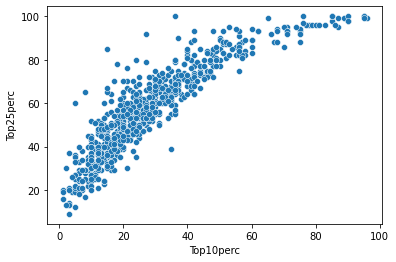

In [76]:
sns.scatterplot(x = 'Top10perc', y= 'Top25perc',data=df1)

<AxesSubplot:xlabel='Outstate', ylabel='Room_Board'>

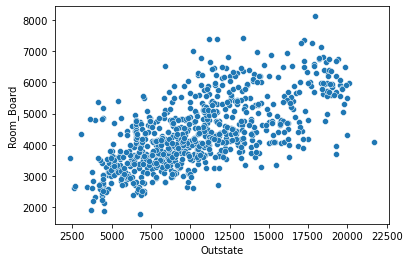

In [77]:
sns.scatterplot(x = 'Outstate', y= 'Room_Board',data=df1)

<AxesSubplot:xlabel='Outstate', ylabel='Expend'>

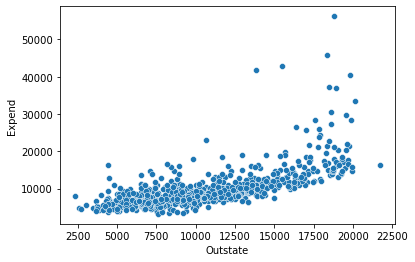

In [78]:
sns.scatterplot(x = 'Outstate', y= 'Expend',data=df1)

<AxesSubplot:xlabel='PhD', ylabel='Terminal'>

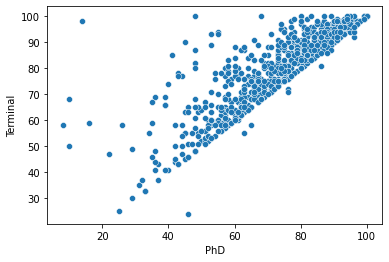

In [79]:
sns.scatterplot(x = 'PhD', y= 'Terminal',data=df1)

In [82]:
print('The variances of the numeric variables are given below')
df1.var()

The variances of the numeric variables are given below


C:\Users\Admin\AppData\Local\Temp/ipykernel_11340/2774038933.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()


Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F_Undergrad    2.352658e+07
P_Undergrad    2.317799e+06
Outstate       1.618466e+07
Room_Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.654282e+02
Terminal       2.167478e+02
SF_Ratio       1.566853e+01
perc_alumni    1.535567e+02
Expend         2.726687e+07
Grad_Rate      2.915125e+02
dtype: float64

In [83]:
# Drop Names column
df2 = df1.drop(['Names'], axis =1)
df2.head(10)

Apps  Accept  Enroll  Top10perc  Top25perc  F_Undergrad  P_Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   
5   587     479     158         38         62          678           41   
6   353     340     103         17         45          416          230   
7  1899    1720     489         37         68         1594           32   
8  1038     839     227         30         63          973          306   
9   582     498     172         21         44          799           78   

   Outstate  Room_Board  Books  Personal  PhD  Terminal  SF_Ratio  \
0      7440        3300    450      2200   70        78      18.1   
1     12280        6450    750      1500   29        30      12.2   
2     11250        3750    400      1165   53        66      12.9   
3     12960        5450    450       875   92        97       7.7   
4      7560        4120    800      1500   76        72      11.9   
5     13500        3335    500       675   67        73       9.4   
6     13290        5720    500      1500   90        93      11.5   
7     13868        4826    450       850   89       100      13.7   
8     15595        4400    300       500   79        84      11.3   
9     10468        3380    660      1800   40        41      11.5   

   perc_alumni  Expend  Grad_Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15  
5           11    9727         55  
6           26    8861         63  
7           37   11487         73  
8           23   11644         80  
9           15    8991         52

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [84]:
# scaling & standardising the data
from scipy.stats import zscore
df3=df2.apply(zscore)
df3.head(10)

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
5 -0.624307 -0.628611 -0.669812   0.592287   0.313426    -0.623421   
6 -0.684808 -0.685356 -0.729043  -0.598931  -0.545505    -0.677472   
7 -0.285088 -0.121984 -0.313353   0.535563   0.616579    -0.434450   
8 -0.507700 -0.481644 -0.595505   0.138490   0.363952    -0.562562   
9 -0.625600 -0.620854 -0.654735  -0.372032  -0.596031    -0.598459   

   P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.161177 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.679375 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.205308 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.190052  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.207340 -0.523535   
5    -0.535212  0.760947   -0.932970 -0.299280 -0.983753 -0.345435 -0.455567   
6    -0.410988  0.708713    1.243144 -0.299280  0.235515  1.067213  0.903786   
7    -0.541127  0.852479    0.427443 -0.602312 -0.725120  1.005793  1.379560   
8    -0.361036  1.282036    0.038754 -1.511408 -1.242385  0.391599  0.292077   
9    -0.510893  0.006798   -0.891911  0.670422  0.678885 -2.003761 -2.630532   

   SF_Ratio  perc_alumni    Expend  Grad_Rate  
0  1.013776    -0.867574 -0.501910  -0.316192  
1 -0.477704    -0.544572  0.166110  -0.550621  
2 -0.300749     0.585935 -0.177290  -0.667836  
3 -1.615274     1.151188  1.792851  -0.374800  
4 -0.553542    -1.675079  0.241803  -2.953517  
5 -1.185526    -0.948325  0.012806  -0.609228  
6 -0.654660     0.262933 -0.153145  -0.140371  
7 -0.098515     1.151188  0.350074   0.445701  
8 -0.705218     0.020681  0.380160   0.855952  
9 -0.654660    -0.625323 -0.128233  -0.785050

In [85]:
# S.D of scaled data=1
df3.std()

Apps           1.000644
Accept         1.000644
Enroll         1.000644
Top10perc      1.000644
Top25perc      1.000644
F_Undergrad    1.000644
P_Undergrad    1.000644
Outstate       1.000644
Room_Board     1.000644
Books          1.000644
Personal       1.000644
PhD            1.000644
Terminal       1.000644
SF_Ratio       1.000644
perc_alumni    1.000644
Expend         1.000644
Grad_Rate      1.000644
dtype: float64

In [86]:
#mean of scaled data =0
df3.mean()

Apps           6.355797e-17
Accept         6.774575e-17
Enroll        -5.249269e-17
Top10perc     -2.753232e-17
Top25perc     -1.546739e-16
F_Undergrad   -1.661405e-16
P_Undergrad   -3.029180e-17
Outstate       6.515595e-17
Room_Board     3.570717e-16
Books         -2.192583e-16
Personal       4.765243e-17
PhD            1.767855e-16
Terminal      -4.481615e-16
SF_Ratio      -2.057556e-17
perc_alumni   -6.022638e-17
Expend         1.213101e-16
Grad_Rate     -3.349244e-16
dtype: float64

## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.

In [87]:
corrMatrix = df3.corr()
print (corrMatrix)

                 Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F_Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P_Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room_Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.392980  0.357938  0.33348

In [88]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df3.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.44666359e-01  8.47913316e-01  3.39270321e-01
   3.52093041e-01  8.15540181e-01  3.98777500e-01  5.02236717e-02
   1.65151509e-01  1.32729421e-01  1.78961168e-01  3.93486554e-01
   3.69967622e-01  9.57562670e-02 -9.03421565e-02  2.59926503e-01
   1.46963658e-01]
 [ 9.44666359e-01  1.00128866e+00  9.12811453e-01  1.92694926e-01
   2.47794654e-01  8.75349854e-01  4.41839380e-01 -2.57877355e-02
   9.10157685e-02  1.13671647e-01  2.01247673e-01  3.58398858e-01
   3.38018401e-01  1.76456113e-01 -1.60196038e-01  1.24877730e-01
   6.54987779e-02]
 [ 8.47913316e-01  9.12811453e-01  1.00128866e+00  1.81527154e-01
   2.27037304e-01  9.65882744e-01  5.13729774e-01 -1.55677702e-01
  -4.02835287e-02  1.12856137e-01  2.81291483e-01  3.33915060e-01
   3.08671332e-01  2.37577072e-01 -1.81027112e-01  6.42519204e-02
  -2.14155645e-02]
 [ 3.39270321e-01  1.92694926e-01  1.81527154e-01  1.00128866e+00
   8.93144451e-01  1.41470801e-01 -1.05492050e-01  5.63055197e-

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

<AxesSubplot:>

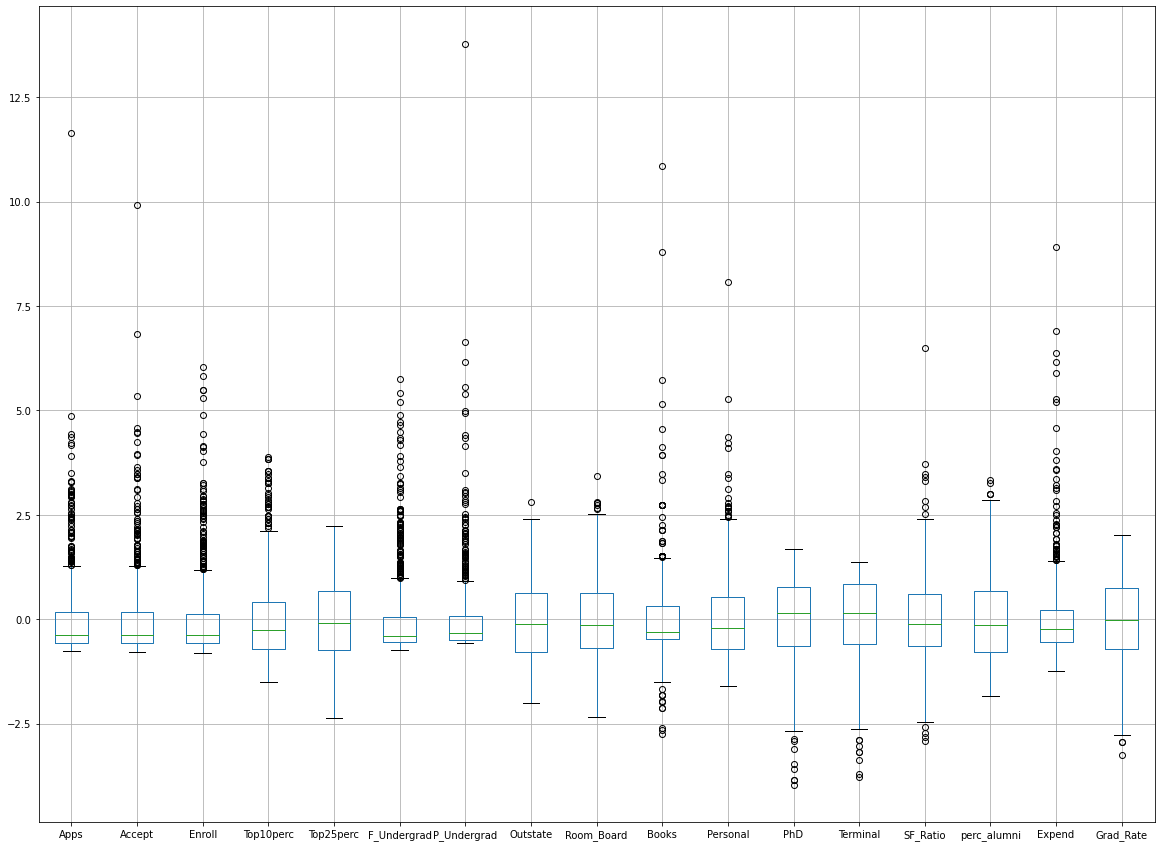

In [89]:
df3.boxplot(figsize=(20,15))

In [90]:
df3.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   6.355797e-17  6.774575e-17 -5.249269e-17 -2.753232e-17 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

        F_Undergrad   P_Undergrad      Outstate    Room_Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.661405e-16 -3.029180e-17  6.515595e-17  3.570717e-16 -2.192583e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01 -5.615022e-01 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01 -4.997191e-01 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01 -3.301442e-01 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02  7.341765e-02  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00  1.378992e+01  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal      SF_Ratio   perc_alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.765243e-17  1.767855e-16 -4.481615e-16 -2.057556e-17 -6.022638e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.969185e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.525326e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.459207e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.601155e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.681408e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend     Grad_Rate  
count  7.770000e+02  7.770000e+02  
mean   1.213101e-16 -3.349244e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.246553e+00  
25%   -5.574826e-01 -7.264428e-01  
50%   -2.458933e-01 -2.315626e-02  
75%    2.241735e-01  7.387375e-01  
max    8.924721e+00  2.028096e+00

In [91]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.46384062 4.4841809  1.17453449 0.99793705 0.93465879 0.84734458
 0.60586408 0.58783511 0.53014189 0.40354672 0.02300969 0.03671503
 0.3131535  0.08806661 0.14299858 0.16777512 0.22030447]


Eigen Vectors 
 %s [[-2.47532537e-01  3.32426877e-01 -5.96777039e-02  2.85096690e-01
  -1.70019622e-04  1.22811932e-02  3.06596836e-02  1.03577277e-01
   8.93297613e-02 -5.07359465e-02  3.59723152e-01 -4.59049537e-01
   4.31741045e-02 -1.32822763e-01 -6.60495278e-02 -5.97045093e-01
  -2.33859080e-02]
 [-2.06299756e-01  3.72875058e-01 -9.77593828e-02  2.71787742e-01
  -5.06165527e-02 -1.12771266e-02  2.81197218e-03  5.55282328e-02
   1.76710689e-01 -4.05496164e-02 -5.44054193e-01  5.17547918e-01
  -5.86528967e-02  1.44994783e-01 -2.62518280e-02 -2.92920428e-01
   1.46702734e-01]
 [-1.75138842e-01  4.04250640e-01 -8.13575684e-02  1.63457087e-01
   5.87975580e-02  4.01196268e-02  2.35400786e-02 -5.83157504e-02
   1.28035155e-01 -3.14617978e-02  6.09048127e-01  4.05328352e-01
  -6

## 2.5 Perform PCA and export the data of the Principal Component scores into a data frame.

## 2.6 Extract the eigenvalues, and eigenvectors.

In [92]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0988744   58.44246116  65.34259565  71.20525863  76.69617559
  81.67414057  85.23346016  88.68686349  91.80133169  94.17208083
  96.01178946  97.30603027  98.29167258  99.13175814  99.64913029
  99.86482309 100.        ]


In [93]:
var_exp


[32.0988744047229,
 26.343586756264347,
 6.90013449320762,
 5.862662971496305,
 5.490916965786854,
 4.977964976700803,
 3.559319593989102,
 3.4534033256864847,
 3.1144682063180786,
 2.3707491311198776,
 1.839708637584616,
 1.2942408033333508,
 0.9856423126916475,
 0.8400855603042299,
 0.517372149951569,
 0.21569280484364076,
 0.1351769059985637]

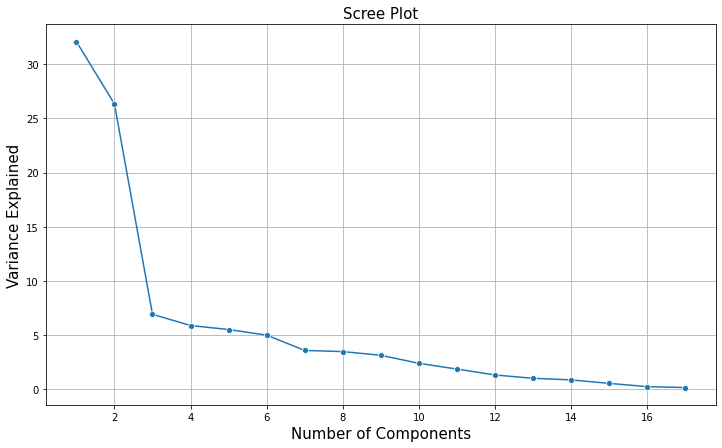

In [94]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [95]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 17 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df3)
df_pca.transpose() # Component output

array([[-1.59178367e+00, -2.19726733e+00, -1.43106151e+00, ...,
        -7.35654959e-01,  7.92729370e+00, -4.57851961e-01],
       [ 7.62095222e-01, -5.82570548e-01, -1.09617695e+00, ...,
        -7.85324092e-02, -2.04892376e+00,  3.62098269e-01],
       [-1.16125321e-01,  2.31716748e+00, -4.34091528e-01, ...,
         1.60923954e-03,  2.08175826e+00, -1.33525267e+00],
       [-9.49497305e-01,  3.59195182e+00,  7.02472205e-01, ...,
         7.26782076e-02,  8.43396721e-01, -1.78424190e-01],
       [-7.24679783e-01,  9.84844680e-01, -3.79119636e-01, ...,
        -5.17643471e-01, -9.60284109e-01, -1.13325642e+00],
       [-3.13274583e-01, -1.26557398e-01, -9.47274775e-01, ...,
         4.72161888e-01, -2.06846796e+00,  8.32020244e-01]])

In [96]:
pca.explained_variance_

array([5.46384062, 4.4841809 , 1.17453449, 0.99793705, 0.93465879,
       0.84734458])

In [97]:
# Loading of each feature on the components
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96776944e-02, -9.77593933e-02, -8.13575785e-02,
         3.42794388e-02, -2.55085711e-02, -6.05628429e-02,
         1.37966830e-01,  4.81491219e-02,  1.52143503e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903120e-01,
        -7.09715605e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918828e-01, -2.0

In [98]:
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663, 0.05490917,
       0.04977965])

In [99]:
#create a dataframe of component loading against each field and identify the pattern
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df3))
df_pca_loading.shape

(6, 17)

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [100]:
df_pca_loading.head(6)

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
0  0.247533  0.206300  0.175139   0.353991   0.343702     0.153528   
1  0.332427  0.372875  0.404251  -0.081508  -0.043914     0.418089   
2 -0.059678 -0.097759 -0.081358   0.034279  -0.025509    -0.060563   
3  0.285097  0.271788  0.163457  -0.055180  -0.115855     0.101292   
4  0.000170  0.050617 -0.058798  -0.394019  -0.423913    -0.045408   
5 -0.012281  0.011277 -0.040120  -0.054194   0.030869    -0.041727   

   P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  Terminal  \
0     0.025786  0.294966    0.248897  0.064283 -0.042598  0.319579  0.316776   
1     0.315119 -0.248748   -0.136928  0.056607  0.219634  0.058854  0.047001   
2     0.137967  0.048149    0.152144  0.679694  0.495300 -0.131903 -0.070972   
3    -0.158951  0.136572    0.191576  0.071380 -0.249033 -0.529195 -0.518145   
4     0.306058  0.220140    0.556677 -0.131995 -0.217224  0.150814  0.214616   
5    -0.193339 -0.026773    0.167220  0.640262 -0.337698  0.083092  0.149282   

   SF_Ratio  perc_alumni    Expend  Grad_Rate  
0 -0.177164     0.205418  0.318606   0.255627  
1  0.246077    -0.246024 -0.130727  -0.168686  
2 -0.291240    -0.147090  0.227919  -0.205241  
3 -0.168468     0.016115  0.086067   0.243113  
4 -0.077059    -0.215815  0.074993  -0.115718  
5  0.485844    -0.047150 -0.297458   0.215657

In [101]:
pca.components_[0]

array([ 0.24753254,  0.20629976,  0.17513884,  0.35399056,  0.34370247,
        0.15352759,  0.02578593,  0.29496599,  0.24889688,  0.06428278,
       -0.04259817,  0.31957923,  0.31677648, -0.17716449,  0.20541801,
        0.31860554,  0.25562687])

Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

## 2.9 Explain the business implication of using the Principal Component Analysis for this

In [102]:
from matplotlib.patches import Rectangle


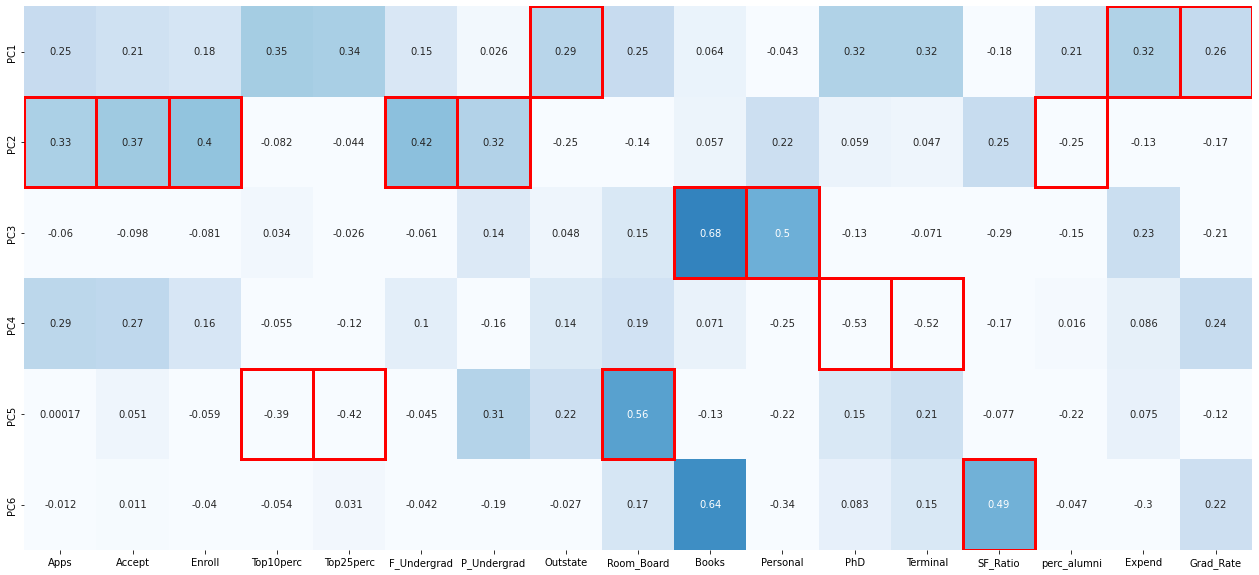

In [103]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))